<a href="https://colab.research.google.com/github/shuangquan-li-con/ECON5200-37499-Applied-Data-Analytics-in-Economics/blob/main/In_class_note_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np

In [42]:
np.random.randint(60,101)

74

In [43]:
grades = np.concatenate([np.random.randint(60,75,40),np.random.randint(75,85,100),np.random.randint(85,101,60)])
grades

array([ 65,  73,  63,  73,  68,  73,  72,  74,  61,  72,  66,  69,  69,
        74,  70,  70,  62,  66,  72,  60,  71,  63,  70,  62,  73,  71,
        65,  70,  70,  70,  63,  68,  71,  71,  74,  72,  61,  60,  74,
        71,  79,  79,  83,  82,  82,  81,  79,  83,  77,  80,  75,  79,
        79,  83,  77,  75,  83,  80,  78,  76,  75,  77,  78,  83,  76,
        81,  79,  80,  84,  83,  80,  77,  81,  79,  82,  82,  82,  75,
        81,  82,  75,  76,  81,  80,  80,  83,  77,  79,  75,  75,  78,
        83,  80,  76,  84,  84,  84,  75,  84,  79,  84,  78,  76,  83,
        80,  80,  83,  83,  83,  82,  80,  77,  80,  84,  80,  75,  80,
        75,  78,  80,  82,  79,  76,  81,  80,  77,  77,  75,  79,  79,
        78,  79,  83,  79,  75,  83,  76,  81,  79,  82,  90,  95,  86,
        92,  92,  95,  89,  99,  93,  98,  93,  99,  95,  87,  99, 100,
        89,  86,  86,  92,  87,  93,  85,  98,  87,  85,  87,  93,  88,
        95,  93,  85,  92,  93,  94,  91,  86,  99,  91,  91,  9

In [44]:
import pandas as pd

df = pd.DataFrame(grades,columns=['grades'])
pop_mean = df['grades'].mean()
print("Poplulation Mean:",pop_mean)
df.describe()

Poplulation Mean: 81.04


,grades
count,200.000000
mean,81.040000
std,9.034184
min,60.000000
25%,75.000000
50%,80.000000
75%,86.250000
max,100.000000


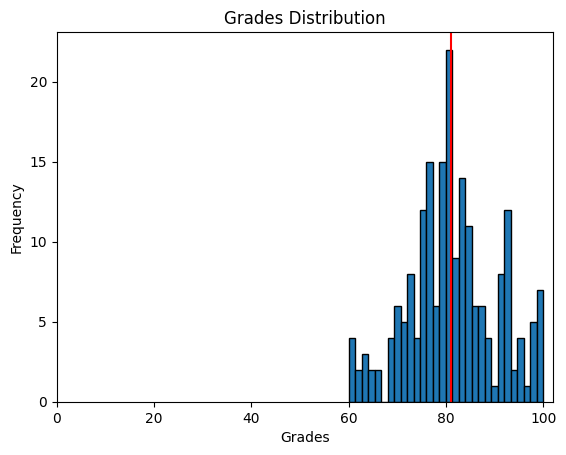

In [45]:
import matplotlib.pyplot as plt
plt.hist(df, bins = 30, edgecolor = 'k')
plt.axvline(pop_mean, color = 'red')
plt.title("Grades Distribution")
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.xlim(xmin=0)
plt.show()

In [46]:
sample_3 = df['grades'].sample(n=3, replace = True)
print(sample_3)
print("Sample Mean:",sample_3.mean())
Sampling_error_3 = sample_3.mean() - pop_mean
print("Sampling Error:",Sampling_error_3)

13    74
1     73
21    63
Name: grades, dtype: int64
Sample Mean: 70.0
Sampling Error: -11.040000000000006


In [47]:
biased_pool = df[df['grades'] > 80]

In [48]:
sample_biased_3 = biased_pool['grades'].sample(n=3, replace = True, weights=df['grades'] )
print(sample_biased_3)
print("Biased Sample Mean:",sample_biased_3.mean())
Sampling_error_biased_3 = sample_biased_3.mean() - pop_mean
print("Biased Sampling Error:",Sampling_error_biased_3)

189    87
167    93
123    81
Name: grades, dtype: int64
Biased Sample Mean: 87.0
Biased Sampling Error: 5.959999999999994


In [49]:
sample_mean =[]

       grades_sample_mean
count         1000.000000
mean            81.008667
std              1.727727
min             75.900000
25%             79.833333
50%             80.933333
75%             82.233333
max             87.633333


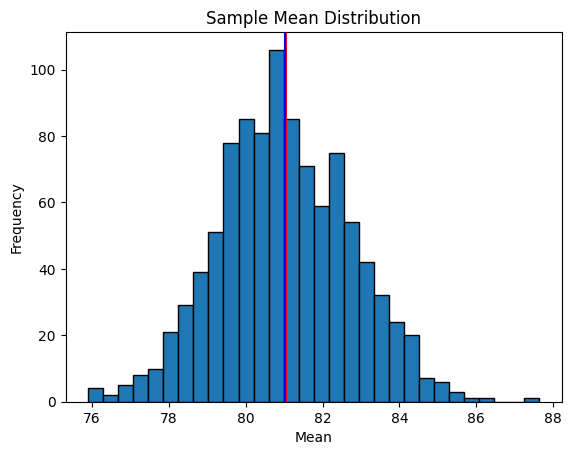

In [50]:
for i in range(1000):
  sample = df['grades'].sample(n=30, replace = True)
  sample_mean.append(sample.mean())

df_sample_mean = pd.DataFrame(sample_mean,columns=['grades_sample_mean'])

print("="*80)
print(df_sample_mean.describe())
print("="*80)
plt.hist(df_sample_mean['grades_sample_mean'], bins = 30, edgecolor = 'k')
plt.title("Sample Mean Distribution")
plt.axvline(pop_mean, color = 'red')
plt.axvline(df_sample_mean['grades_sample_mean'].mean(), color = 'blue')
plt.xlabel("Mean")
plt.ylabel("Frequency")
plt.show()

# **With a known population mean and standard deviation.**

In [51]:
s_e_sample_3_1k = df.std() / np.sqrt(3)
print(s_e_sample_3_1k)

grades    5.215889
dtype: float64


In [52]:
s_e_sample_30_1k = df.std() / np.sqrt(30)
print(s_e_sample_30_1k)

grades    1.649409
dtype: float64


In [53]:
m_e = 1.96 * s_e_sample_30_1k
m_e

,0
grades,3.232841


In [54]:
upper_bound = df_sample_mean['grades_sample_mean'].mean() + 1.96*s_e_sample_30_1k
upper_bound

,0
grades,84.241508


In [55]:
lower_bound = df_sample_mean['grades_sample_mean'].mean() - 1.96*s_e_sample_30_1k
lower_bound

,0
grades,77.775825


In [56]:
C_I_95 = [f"{lower_bound['grades']:.2f}",f"{upper_bound['grades']:.2f}"]
print(C_I_95)

['77.78', '84.24']


In [57]:
import scipy.stats as stats
ci = stats.norm.interval(0.95, loc=df_sample_mean['grades_sample_mean'].mean(), scale=s_e_sample_30_1k)
ci

(array([77.77588481]), array([84.24144852]))

# **Sample of n = 30 (only 1 study)**

In [58]:
sample_30 = df['grades'].sample(n=30, replace = True)
print("Sample Mean:",sample_30.mean())
sampling_error_30 = sample_30.mean() - pop_mean
print("Sampling Error:",sampling_error_30)

Sample Mean: 83.03333333333333
Sampling Error: 1.9933333333333252


In [59]:
import scipy.stats as stats

z_score = (sample_30.mean() - pop_mean) / (df.std() / np.sqrt(30))
z_score

,0
grades,1.208514


In [60]:
p_value = stats.norm.sf(abs(z_score)) * 2
print(p_value)
if p_value < 0.05:
    print("Significant! Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

[0.22684968]
Fail to Reject Null Hypothesis


# **With an sample mean and standard deviation(t-distribution).**

In [61]:
t_stat, p_val = stats.ttest_1samp(sample_30, popmean=pop_mean)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

T-statistic: 1.1004
P-value: 0.2802
Fail to Reject Null Hypothesis


In [62]:
ci = stats.t.interval(0.95, len(sample_30)-1, loc=np.mean(sample_30), scale=stats.sem(sample_30))
print(f"95% Confidence Interval: {ci}")

95% Confidence Interval: (np.float64(79.32837802885501), np.float64(86.73828863781165))


# **Case Study: Do experienced poker players change strategy after a big win/loss?**

In [63]:
import seaborn as sns

# SETUP
null_mean = 35.00       # H0: The "General Population" Average
sample_mean = 25.53     # The "Pro Player" Average
n_pro = 203             # Sample size
t_stat_target = -15.82  # Target t-statistic from slides
std_dev = 8.5

In [64]:
# 2. SIMULATION
np.random.seed(41)
pop_size = 100000
population_data = np.random.normal(loc=null_mean, scale=std_dev, size=pop_size)

In [65]:
# We generate 203 players with the lower mean (25.53) to represent the pros.
pro_sample = np.random.normal(loc=sample_mean, scale=std_dev, size=n_pro)

In [66]:
# Test if our "Pro Sample" comes from a population with mean = 35
t_stat, p_val = stats.ttest_1samp(pro_sample, popmean=null_mean)

print("-" * 50)
print("HYPOTHESIS TEST RESULTS")
print("-" * 50)
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_val:.2e}")

if p_val < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

--------------------------------------------------
HYPOTHESIS TEST RESULTS
--------------------------------------------------
T-Statistic: -15.67
P-Value: 9.45e-37
Reject Null Hypothesis


In [67]:
# Calculate the 95% CI for the mean of the Pro Players
ci_low, ci_high = stats.t.interval(confidence=0.95,
                                   df=len(pro_sample)-1,
                                   loc=np.mean(pro_sample),
                                   scale=stats.sem(pro_sample))

print(f"95% Confidence Interval: [{ci_low:.2f}, {ci_high:.2f}]")

95% Confidence Interval: [23.92, 26.40]


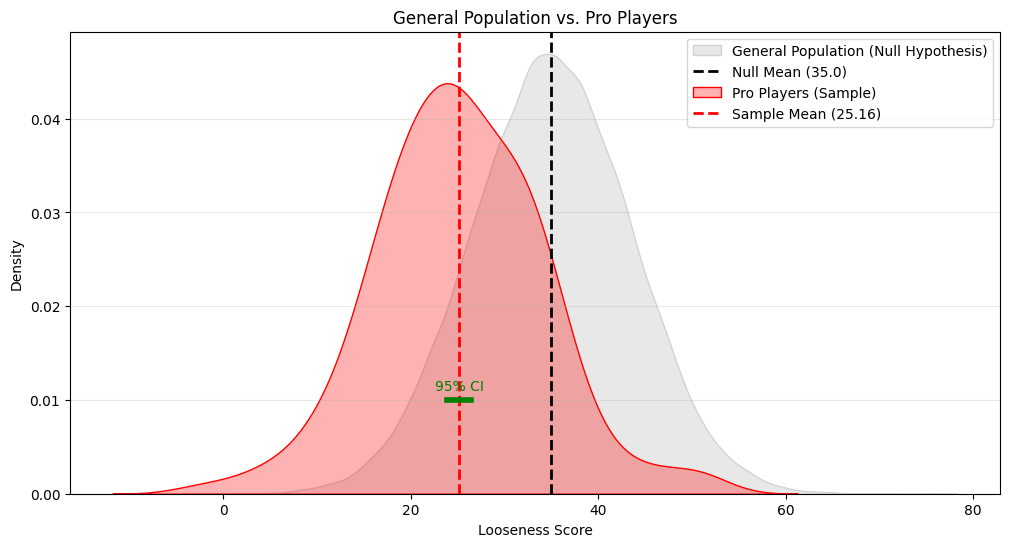

In [68]:
plt.figure(figsize=(12, 6))

# Plot the General Population (Grey)
sns.kdeplot(population_data, fill=True, color='lightgrey', label='General Population (Null Hypothesis)', alpha=0.5)
plt.axvline(null_mean, color='black', linestyle='--', linewidth=2, label=f'Null Mean ({null_mean})')

# Plot the Pro Sample (Red)
sns.kdeplot(pro_sample, fill=True, color='red', label='Pro Players (Sample)', alpha=0.3)
plt.axvline(pro_sample.mean(), color='red', linestyle='--', linewidth=2, label=f'Sample Mean ({pro_sample.mean():.2f})')

plt.title("General Population vs. Pro Players")
plt.xlabel("Looseness Score")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.plot([ci_low, ci_high], [0.01, 0.01], color='green', linewidth=4, label='95% Confidence Interval')
plt.text((ci_low+ci_high)/2, 0.011, "95% CI", color='green', ha='center')

plt.show()

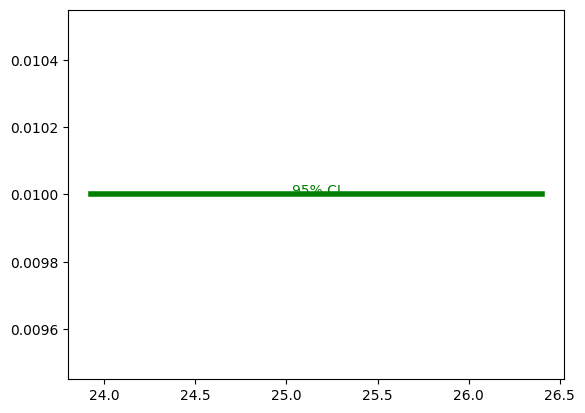

In [69]:
plt.plot([ci_low, ci_high], [0.01, 0.01], color='green', linewidth=4, label='95% Confidence Interval')
plt.text((ci_low+ci_high)/2, 0.01, "95% CI", color='green', ha='center')
plt.show()

### 1. Hair Salon Prices (Matched-Pair Data)

This study compares the price of haircuts for men and women at the same salons.

In [70]:
# Load Raw Transactions
df_salon = pd.read_csv('hair_salon_transactions.csv')
print(df_salon.head(10))

                  Salon  Gender  Price
0  Newbury Street Salon  Female  48.04
1        Fenway Barbers  Female  32.14
2      South End Studio    Male  43.93
3     Beacon Hill Salon  Female  48.55
4          Roxbury Cuts  Female  69.27
5            Floyd's 99    Male  37.79
6           Campus Cuts    Male  25.95
7  Newbury Street Salon  Female  50.24
8       Harvard Sq Hair  Female  31.97
9       Harvard Sq Hair    Male  19.88


In [71]:
# 1. PIVOT / GROUP BY to get Average Price per Salon per Gender
# We want one row per Salon, with columns for 'Male' and 'Female' price
salon_summary = df_salon.groupby(['Salon', 'Gender'])['Price'].mean().unstack()
salon_summary['Difference'] = salon_summary['Female'] - salon_summary['Male']
print(salon_summary)

Gender                   Female       Male  Difference
Salon                                                 
Back Bay Hair         57.381031  42.304103   15.076928
Beacon Hill Salon     49.095982  48.834872    0.261110
Boston Barber         44.092692  33.879310   10.213382
Cambridge Cuts        52.908598  43.103030    9.805568
Campus Cuts           34.951789  30.097629    4.854161
Chinatown Barber      47.760673  43.175638    4.585035
Downtown Cuts         23.962182  21.113363    2.848819
Fenway Barbers        32.832396  29.846639    2.985757
Floyd's 99            39.889223  37.758365    2.130858
Great Clips           27.267281  26.876753    0.390527
Harvard Sq Hair       31.916077  21.977982    9.938095
Newbury Street Salon  48.151327  48.186154   -0.034827
Northeastern Salon    59.151200  58.795120    0.356080
Roxbury Cuts          67.063945  56.850000   10.213945
Seaport Studio        47.733855  43.269406    4.464449
Sola Salon            43.880636  39.937030    3.943607
South End 

In [72]:
# Null Hypothesis (H0): Mean Gain = 0 (No improvement)
t_stat, p_val = stats.ttest_1samp(salon_summary['Difference'], popmean=0)

# 4. REPORT FINDINGS
print("Mean Economic Gain:", salon_summary['Difference'].mean())
print(f"Standard Deviation:" ,salon_summary['Difference'].std())
print(f"T-Statistic:", t_stat)
print(f"P-Value:", p_val)

if p_val < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Mean Economic Gain: 5.120497162189869
Standard Deviation: 4.395064668791583
T-Statistic: 5.210289538879262
P-Value: 4.981146514297368e-05
Reject Null Hypothesis


### 2. Immigrant Mothers & Daughters (Economic Status)

This study compares the economic percentile of immigrant mothers vs. their adult daughters. We have the 4,121 raw records.

In [73]:
df = pd.read_csv('immigrant_mobility_study.csv')
print(df.head())

   Pair_ID  Mother_Year  Mother_Zip  Mother_Pct  Daughter_Year  Daughter_Zip  \
0        1         1970       95266        50.9           2000         94258   
1        2         1970       91548        39.5           2000         92740   
2        3         1970       94019        53.7           2000         90979   
3        4         1970       94205        69.4           2000         90518   
4        5         1970       91369        37.8           2000         94994   

   Daughter_Pct  
0          50.7  
1          67.6  
2          62.4  
3          80.7  
4          12.8  


In [74]:
# 2. CALCULATE THE "ECONOMIC MOBILITY" (Difference)
# Matched Pair: Daughter - Mother
df['Mobility_Gain'] = df['Daughter_Pct'] - df['Mother_Pct']

In [75]:
# 3. PERFORM THE T-TEST
# Null Hypothesis (H0): Mean Gain = 0 (No improvement)
t_stat, p_val = stats.ttest_1samp(df['Mobility_Gain'], popmean=0)

# 4. REPORT FINDINGS
print("Mean Economic Gain:", df['Mobility_Gain'].mean())
print(f"Standard Deviation:" ,df['Mobility_Gain'].std())
print(f"T-Statistic:", t_stat)
print(f"P-Value:", p_val)

if p_val < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Mean Economic Gain: 3.216986168405727
Standard Deviation: 23.654490896136203
T-Statistic: 8.730455348791505
P-Value: 3.626000170977397e-18
Reject Null Hypothesis


# **Do Admired Companies Win?**
### 3. Fortune Top 10 vs. S&P 500 (Stock Returns)

Each year, Fortune magazine lists America's most admired companies, highlighting the top 10. The question is whether the stocks of these top companies outperform the average stock.

In [79]:
import yfinance as yf

In [77]:
# 1. SETUP
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'BRK-B', 'JNJ', 'JPM', 'PG', 'KO', 'DIS']
market_ticker = '^GSPC' # S&P 500

# 2. DOWNLOAD DATA
# Added 'auto_adjust=False' to ensure 'Adj Close' column exists
start_date = '2004-01-01'
end_date = '2024-01-01'

stocks_data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)
market_data = yf.download(market_ticker, start=start_date, end=end_date, auto_adjust=False)

# Select 'Adj Close' explicitly
stocks_df = stocks_data['Adj Close']
market_df = market_data['Adj Close']

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  1 of 1 completed


In [83]:
market_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2004-01-02,1108.479980,1108.479980,1118.849976,1105.079956,1111.920044,1153200000
2004-01-05,1122.219971,1122.219971,1122.219971,1108.479980,1108.479980,1578200000
2004-01-06,1123.670044,1123.670044,1124.459961,1118.439941,1122.219971,1494500000
2004-01-07,1126.329956,1126.329956,1126.329956,1116.449951,1123.670044,1704900000
2004-01-08,1131.920044,1131.920044,1131.920044,1124.910034,1126.329956,1868400000
...,...,...,...,...,...,...
2023-12-22,4754.629883,4754.629883,4772.939941,4736.770020,4753.919922,3046770000
2023-12-26,4774.750000,4774.750000,4784.720215,4758.450195,4758.859863,2513910000


In [84]:
# 3. CALCULATE RETURNS
stock_returns = stocks_df.pct_change().dropna()
market_returns = market_df.pct_change().dropna()

In [87]:
# 4. CREATE ADMIRED PORTFOLIO (Equal Weight)
portfolio_returns = stock_returns.mean(axis=1)
portfolio_returns
market_returns

Ticker,^GSPC
Date,
2004-01-05,0.012395
2004-01-06,0.001292
2004-01-07,0.002367
2004-01-08,0.004963
2004-01-09,-0.008888
...,...
2023-12-22,0.001660
2023-12-26,0.004232
2023-12-27,0.001430


In [90]:
# Align Data
aligned_data = pd.concat([portfolio_returns,market_returns],axis=1).dropna()
aligned_data.columns = ["Portfolio","Market"]


In [91]:
# 5. CALCULATE DIFFERENCE
aligned_data['Difference'] = aligned_data['Portfolio'] - aligned_data['Market']


,Portfolio,Market,Difference
Date,,,
2004-08-20,0.014718,0.006525,0.008193
2004-08-23,-0.000094,-0.002431,0.002337
2004-08-24,-0.003022,0.000465,-0.003488
2004-08-25,0.015619,0.008000,0.007618
2004-08-26,0.007508,0.000118,0.007390
...,...,...,...
2023-12-22,0.000835,0.001660,-0.000825
2023-12-26,0.001671,0.004232,-0.002561
2023-12-27,-0.000484,0.001430,-0.001915


In [93]:
# 6. RUN T-TEST
#Null Hypothesis: Mean Difference in Stock Return = 0(No Impromveents)
t_stat, p_val = stats.ttest_1samp(aligned_data['Difference'], popmean=0)

# 4. REPORT FINDINGS
print("Mean Economic Gain:", aligned_data['Difference'].mean())
print(f"Standard Deviation:" ,aligned_data['Difference'].std())
print(f"T-Statistic:", t_stat)
print(f"P-Value:", p_val)

if p_val < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Mean Economic Gain: 0.0003431148362869824
Standard Deviation: 0.004215592132145169
T-Statistic: 5.682293663420532
P-Value: 1.4062689218412132e-08
Reject Null Hypothesis


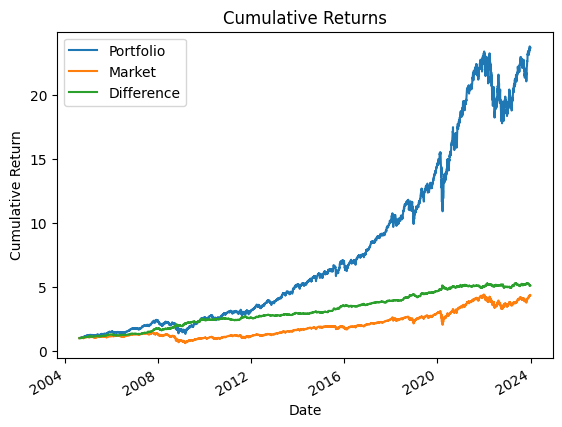

In [96]:
# Simple Plot
(1 + aligned_data).cumprod().plot()
plt.title("Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.show()

# **The Theory: Do people with positive initials (A.C.E., V.I.P.) live longer than those with negative initials (P.I.G., D.I.E.)?**

In [98]:
# Load Data
df = pd.read_csv("/content/fateful_initials.csv")
df

,id,initials,category,birth_year,death_year,death_age,gender
0,1,WOW,Positive,1903,1969,65.3,Male
1,2,WIN,Positive,1947,1969,21.3,Male
2,3,JOY,Positive,1930,1987,56.3,Male
3,4,VIP,Positive,1920,1973,52.3,Male
4,5,ACE,Positive,1884,1981,96.3,Male
...,...,...,...,...,...,...,...
5995,5996,PTR,Control,1932,1983,51.0,Male
5996,5997,PTR,Control,1920,1988,68.0,Male
5997,5998,XYZ,Control,1937,1976,39.0,Male
5998,5999,ABC,Control,1919,1985,66.0,Male


In [100]:
# 1. Calculate Averages
means = df.groupby('category')['death_age'].mean()
means

,death_age
category,
Control,65.4034
Negative,62.5080
Positive,69.8740


In [101]:
# 2. Check the Difference (Positive vs Control)
diff = means['Positive'] - means['Negative']
print(f"\nPositive vs Negative: {diff:.2f} years")


Positive vs Negative: 7.37 years


In [102]:
# 3. Significance Test (T-Test)
# We compare the actual ages of 'Positive' people vs 'Control' people
positive_ages = df[df['category'] == 'Positive']['death_age']
negative_ages = df[df['category'] == 'Negative']['death_age']

t_stat, p_val = stats.ttest_ind(positive_ages, negative_ages)

print(f"P-Value: {p_val:.5f}")
if p_val < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

P-Value: 0.00000
Reject Null Hypothesis


In [104]:
print("-" * 50)
print("THE REALITY: Controlled for Birth Year")
print("-" * 50)

# 1. Group by Birth Year AND Category
grouped = df.groupby(['birth_year','category'])['death_age'].mean().unstack()

# 2. Calculate differences WITHIN each birth year
grouped['pos_diff'] = grouped["Positive"] - grouped["Negative"]

# Drop years with missing data
valid_diffs = grouped['pos_diff'].dropna()

# 3. Run T-Test on the DIFFERENCES
t_stat, p_val = stats.ttest_1samp(valid_diffs, popmean=0)

print(f"Controlled Difference: {valid_diffs.mean():.2f} years (Target: -0.83)")
print(f"T-Statistic: {t_stat:.2f} (Target: -1.84)")
print(f"P-Value: {p_val:.4f} (Target: ~0.06)")

print("-" * 50)
if p_val > 0.05:
    print("CONCLUSION: Not Significant (p > 0.05).")
    print("The positive effect disappeared!")
else:
    print("Conclusion: Significant.")

--------------------------------------------------
THE REALITY: Controlled for Birth Year
--------------------------------------------------
Controlled Difference: -0.93 years (Target: -0.83)
T-Statistic: -1.44 (Target: -1.84)
P-Value: 0.1547 (Target: ~0.06)
--------------------------------------------------
CONCLUSION: Not Significant (p > 0.05).
The positive effect disappeared!


In [108]:
# The Millionarie Maker - Powerball Edition
def generate_powerball_ticket(num_tickets=1):
  for i in range(num_tickets):
    white_balls = np.random.choice(range(1,70),size=1,replace=False)
    red_ball = np.random.choice(range(1,27),size=1)
    print(f"White Ball:{white_balls},Red Ball:{red_ball}")

In [109]:
generate_powerball_ticket(5)

White Ball:[37],Red Ball:[8]
White Ball:[12],Red Ball:[5]
White Ball:[63],Red Ball:[15]
White Ball:[32],Red Ball:[2]
White Ball:[40],Red Ball:[5]
